# Communicate Data Findings - Ford GoBike System Data
### by Oyebade James


## Table of Contents
- [Preliminary Wrangling](#wrangle)
- [Introduction](#intro)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary)
- [References](#references)

## Preliminary Wrangling

### Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Ford GoBike, the San Francisco Bay Area's new regional bike share network, is a public-private partnership between the Metropolitan Transportation Commission (MTC) and Motivate. Motivate, the global leader in bike share, operates tens of thousands of bikes across four continents. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. When completed in 2018, the Bay Area’s 7,000-bike, 546-station Ford GoBike network will be the second-largest bike share system in North America, while setting new national standards in density, convenience and socio-economic equity. Biking is one of the least expensive and most environmentally friendly transportation options available today. In many cases, biking also cuts commute time. Bike share is one of the many ways cities can help increase mobility as well as meet sustainability goals, without increasing traffic and congestion. Ford Motor Company is the program's title partner, whose support enables Ford GoBike to bring the myriad public benefits of state-of-the-art bike share to San Francisco, San Jose, Oakland, Berkeley and Emeryville — at no cost to taxpayers for capital or operational expenditures.


This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. In the first part, I will be using Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables. In the second part, I will be producing a short presentation that illustrates interesting properties, trends, and relationships that I discovered in this dataset. The primary method of conveying my findings will be through transforming my exploratory visualizations from the first part into polished, explanatory visualizations.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load ford gobike system data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# check the first 5 rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# check the statistic description of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


#### Assess

In [7]:
# check for duplicates
sum(df.duplicated())

0

In [8]:
# unique values in the dataset
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

**user_type**, **member_gender** and **bike_share_for_all_trip** have 2, 3 and 2 unique values respectively. Therefore, they are categorical data types. 

In [9]:
df.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
1992.0     8250
1987.0     8018
1986.0     7973
1994.0     7660
1995.0     7423
1985.0     7028
1984.0     6562
1983.0     5954
1980.0     5024
1982.0     4990
1996.0     4640
1981.0     4345
1979.0     3756
1997.0     3481
1998.0     3208
1978.0     2830
1977.0     2725
1974.0     2633
1999.0     2528
1975.0     2503
1976.0     2442
1973.0     2080
1968.0     1928
1971.0     1924
1972.0     1909
          ...  
1954.0      301
1952.0      189
1951.0      180
1950.0      178
1953.0      158
1947.0      135
1955.0      134
1945.0      105
1949.0       99
1931.0       89
1900.0       53
1948.0       51
2001.0       34
1943.0       30
1942.0       21
1933.0       20
1946.0       19
1902.0       11
1939.0       11
1941.0        9
1901.0        6
1938.0        3
1920.0        3
1934.0        2
1944.0        2
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year,

In [10]:
# check missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
# check if any of the columns have null values
df.isnull().sum().any()

True

In [12]:
df.start_station_name.value_counts()

Market St at 10th St                                               3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3544
Berry St at 4th St                                                 3052
Montgomery St BART Station (Market St at 2nd St)                   2895
Powell St BART Station (Market St at 4th St)                       2760
San Francisco Ferry Building (Harry Bridges Plaza)                 2710
San Francisco Caltrain (Townsend St at 4th St)                     2703
Powell St BART Station (Market St at 5th St)                       2327
Howard St at Beale St                                              2293
Steuart St at Market St                                            2283
The Embarcadero at Sansome St                                      2082
Bancroft Way at Telegraph Ave                                      1796
Bancroft Way at College Ave                                        1770
2nd St at Townsend St                                           

In [13]:
df.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4857
Market St at 10th St                                               3973
Montgomery St BART Station (Market St at 2nd St)                   3647
San Francisco Ferry Building (Harry Bridges Plaza)                 3368
Powell St BART Station (Market St at 4th St)                       2997
San Francisco Caltrain (Townsend St at 4th St)                     2947
Berry St at 4th St                                                 2872
The Embarcadero at Sansome St                                      2512
Powell St BART Station (Market St at 5th St)                       2353
Steuart St at Market St                                            2338
Howard St at Beale St                                              2034
Civic Center/UN Plaza BART Station (Market St at McAllister St)    1865
Bancroft Way at Telegraph Ave                                      1814
Beale St at Harrison St                                         

In [14]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [15]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [16]:
sum(df.duration_sec.isnull())

0

In [17]:
sum(df.start_time.isnull())

0

In [18]:
sum(df.end_time.isnull())

0

In [19]:
print(df.start_station_latitude.isnull().sum())
print(df.start_station_longitude.isnull().sum())
print(df.end_station_latitude.isnull().sum())
print(df.end_station_longitude.isnull().sum())

0
0
0
0


From the assessment above, the following are the quality issues that need to be cleaned before I proceed to my exploratory data analysis.

#### Quality Issues

##### From the `gobike system data` table;

  - Missing data in (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender) ***(can't clean yet)***
  - Wrong format I: start_time, end_time are not in the right formats. Datetime instead of floats
  - Wrong format II: start_station_id, end_station_id, bike_id are floats instead of strings
  - Wrong format III: member_birth_year is float instead of integer
  - Wrong format IV: user_type, member_gender and bike_share_for_all_trip are objects instead of  categories.
  - Erroneous data: member_birth_year has a few incorrect entries
  
  
  #### Tidiness Issues

##### From the `gobike system data` table;

  - Joint variables: Timestamp start_time and end_time contain year, month and day and time
 

#### Clean

Now it's time to fix the quality issues spotted above 

In [20]:
df_clean = df.copy()

##### Wrong format I

start_time, end_time are not in the right formats. Datetime instead of floats

##### Define

Change both timestamps to datetime format

##### Code

In [21]:
# import necessary library
import datetime

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

##### Test

In [22]:
print(df_clean.start_time.dtypes)
print(df_clean.end_time.dtypes)

datetime64[ns]
datetime64[ns]


##### Wrong format II

start_station_id, end_station_id, bike_id are floats instead of strings

##### Define

Change ids from floats to strings format

##### Code

In [23]:
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

##### Test

In [24]:
print(df_clean.bike_id.dtypes)
print(df_clean.start_station_id.dtypes)
print(df_clean.end_station_id.dtypes)

object
object
object


##### Erroneous data

member_birth_year has a few incorrect entries

##### Define

Create a boolean series and keep only rows that are true. Therefore select the entries of member birth year from 1900

##### Code

In [25]:
# create a boolean series and keep only the ones that are true
df_clean = df_clean.loc[df_clean.member_birth_year.astype(float) >= 1900]

##### Test

In [26]:
df_clean.member_birth_year.describe()

count    175146.000000
mean       1984.807047
std          10.113498
min        1900.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

##### Wrong format III

member_birth_year is float instead of integer

##### Define

Downcast to integer and use floats to rep nans. Then convert member_birth_year from float to int

##### Code

In [27]:
# downcast to integer and change nans to float
pd.to_numeric(df_clean.member_birth_year, downcast='integer').fillna(0)

0         1984
2         1972
3         1989
4         1974
5         1959
6         1983
7         1989
8         1988
9         1992
10        1996
11        1993
12        1990
14        1988
15        1993
16        1981
17        1975
18        1990
19        1978
20        1983
21        1984
22        1991
23        1997
24        1975
25        1986
26        2000
27        1982
29        1995
30        1996
31        1993
32        1980
          ... 
183381    1997
183382    1988
183383    1997
183384    1991
183385    1945
183386    1998
183387    1999
183388    1927
183389    1985
183390    1999
183391    1980
183392    1993
183393    1985
183394    1975
183395    1993
183396    1991
183397    1988
183398    1982
183399    1993
183400    1984
183401    1991
183403    2000
183404    1980
183405    1984
183406    1988
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 175146, dtype: int16

In [28]:
# convert member birth year to integer
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

##### Test

In [29]:
df_clean.member_birth_year.describe()

count    175146.000000
mean       1984.807047
std          10.113498
min        1900.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [30]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [31]:
# create a new column that contains member age
df_clean['member_age'] = 2019 - df_clean.member_birth_year

In [32]:
df_clean['member_age'].head()

0    35
2    47
3    30
4    45
5    60
Name: member_age, dtype: int64

Now, let's categorize the age of users.

In [33]:
# group age in clusters of generations
bins = [18, 25, 41, 57, 67, 76, 120]
labels = ['Gen Z', 'Millennials', 'Gen X', 'Boomers II', 'Boomers I', 'Post War']
df_clean['age_group']= pd.cut(df_clean['member_age'], bins, labels = labels, include_lowest = True)

In [34]:
df_clean.age_group.value_counts()

Millennials    110419
Gen Z           30652
Gen X           28294
Boomers II       4750
Boomers I         799
Post War          232
Name: age_group, dtype: int64

In [35]:
# convert to category data type
df_clean.age_group = df_clean.age_group.astype('category')

In [36]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,Millennials
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,Gen X
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,Millennials
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,Gen X
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,Boomers II


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175146 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               175146 non-null int64
start_time                 175146 non-null datetime64[ns]
end_time                   175146 non-null datetime64[ns]
start_station_id           175146 non-null object
start_station_name         174951 non-null object
start_station_latitude     175146 non-null float64
start_station_longitude    175146 non-null float64
end_station_id             175146 non-null object
end_station_name           174951 non-null object
end_station_latitude       175146 non-null float64
end_station_longitude      175146 non-null float64
bike_id                    175146 non-null object
user_type                  175146 non-null object
member_birth_year          175146 non-null int64
member_gender              175146 non-null object
bike_share_for_all_trip    175146 non-null object
member_age                 175146 non-null int64
age_group             

In [38]:
df_clean.member_age.describe()

count    175146.000000
mean         34.192953
std          10.113498
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         119.000000
Name: member_age, dtype: float64

##### Wrong format IV

user_type, member_gender and bike_share_for_all_trip are objects instead of categories.

##### Define

Convert all the three variables to categories using astype

##### Code

In [39]:
# convert to category format
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

##### Test

In [40]:
print(df_clean.user_type.dtypes)
print(df_clean.member_gender.dtypes)
print(df_clean.bike_share_for_all_trip.dtypes)

category
category
category


#### Tidiness Issues

##### Joint variables

start_time and end_time contains year, month and day and time

##### Define

First, convert duration from seconds to minutes. Second, convert timestamp to datetime to extract month, day and month from start_time and end_time. Third, merge the time data with df_clean. And finally, drop columns that are not needed.

##### Code

In [41]:
# convert duration from seconds to minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

# convert from float to integer
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

In [42]:
# convert timestamp column to datetime
st = pd.to_datetime(df_clean['start_time'], unit='ms')

In [43]:
# extract hour, day, week, month, year and day of the week from start_time (datetime)
start_time_data = [st, \
             st.dt.hour, \
             st.dt.day, \
             st.dt.week, \
             st.dt.month, \
             st.dt.year, \
             st.dt.dayofweek]

In [44]:
# create a new start time dataframe
column_labels = ['start_time', 'start_time_hour', 'start_time_day', 'start_time_week', 'start_month', 'start_time_year', 'start_time_day_of_week']

start_time_df = pd.DataFrame(dict(zip(column_labels, start_time_data)))

In [45]:
start_time_df.head()

,start_time,start_time_hour,start_time_day,start_time_week,start_month,start_time_year,start_time_day_of_week
0,2019-02-28 17:32:10.145,17,28,9,2,2019,3
2,2019-02-28 12:13:13.218,12,28,9,2,2019,3
3,2019-02-28 17:54:26.010,17,28,9,2,2019,3
4,2019-02-28 23:54:18.549,23,28,9,2,2019,3
5,2019-02-28 23:49:58.632,23,28,9,2,2019,3


In [46]:
# also convert end time to datetime
et = pd.to_datetime(df_clean['end_time'], unit='ms')

In [47]:
# extract hour, day, week, month, year and day of the week from end time (datetime)
end_time_data = [et, \
             et.dt.hour, \
             et.dt.day, \
             et.dt.week, \
             et.dt.month, \
             et.dt.year, \
             et.dt.dayofweek]

In [48]:
# create a new end time dataframe
column_labels = ['end_time', 'end_time_hour', 'end_time_day', 'end_time_week', 'end_month', 'end_time_year', 'end_time_day_of_week']

end_time_df = pd.DataFrame(dict(zip(column_labels, end_time_data)))

In [49]:
end_time_df.head()

,end_time,end_time_hour,end_time_day,end_time_week,end_month,end_time_year,end_time_day_of_week
0,2019-03-01 08:01:55.975,8,1,9,3,2019,4
2,2019-03-01 05:24:08.146,5,1,9,3,2019,4
3,2019-03-01 04:02:36.842,4,1,9,3,2019,4
4,2019-03-01 00:20:44.074,0,1,9,3,2019,4
5,2019-03-01 00:19:51.760,0,1,9,3,2019,4


In [50]:
# now, join start time table with df_clean
df_clean = pd.merge(df_clean, start_time_df,
                            on='start_time', how='left')

In [51]:
# convert start time month to Gregorian calendar month
df_clean['start_time_month'] = pd.to_datetime(df_clean['start_time'], format='%m').dt.month_name().str.slice(stop=3)

In [52]:
df_clean.start_time_month.value_counts()

Feb    175168
Name: start_time_month, dtype: int64

A reminder again that this dataset only contains entries for the month of February only

In [53]:
# extract week day from start time
df_clean['start_time_weekday'] = pd.to_datetime(df_clean['start_time'], format='%a').dt.day_name()

In [54]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,age_group,duration_min,start_time_hour,start_time_day,start_time_week,start_month,start_time_year,start_time_day_of_week,start_time_month,start_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Millennials,869,17,28,9,2,2019,3,Feb,Thursday
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Gen X,1030,12,28,9,2,2019,3,Feb,Thursday
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Millennials,608,17,28,9,2,2019,3,Feb,Thursday
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Gen X,26,23,28,9,2,2019,3,Feb,Thursday
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Boomers II,29,23,28,9,2,2019,3,Feb,Thursday


In [55]:
# also, join end time table with df_clean
df_clean = pd.merge(df_clean, end_time_df,
                            on='end_time', how='left')

In [56]:
# convert end time month to Gregorian calendar month
df_clean['end_time_month'] = pd.to_datetime(df_clean['end_time'], format='%m').dt.month_name().str.slice(stop=3)

In [57]:
# extract week day from end time
df_clean['end_time_weekday'] = pd.to_datetime(df_clean['end_time'], format='%a').dt.day_name()

In [58]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_month,start_time_weekday,end_time_hour,end_time_day,end_time_week,end_month,end_time_year,end_time_day_of_week,end_time_month,end_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Feb,Thursday,8,1,9,3,2019,4,Mar,Friday
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Feb,Thursday,5,1,9,3,2019,4,Mar,Friday
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Feb,Thursday,4,1,9,3,2019,4,Mar,Friday
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Feb,Thursday,0,1,9,3,2019,4,Mar,Friday
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Feb,Thursday,0,1,9,3,2019,4,Mar,Friday


In [59]:
# create new column for year
df_clean['trip_year'] = df_clean['start_time'].dt.year

#drop the former column
df_clean = df_clean.drop('start_time_year', axis=1)

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175194 entries, 0 to 175193
Data columns (total 35 columns):
duration_sec               175194 non-null int64
start_time                 175194 non-null datetime64[ns]
end_time                   175194 non-null datetime64[ns]
start_station_id           175194 non-null object
start_station_name         174999 non-null object
start_station_latitude     175194 non-null float64
start_station_longitude    175194 non-null float64
end_station_id             175194 non-null object
end_station_name           174999 non-null object
end_station_latitude       175194 non-null float64
end_station_longitude      175194 non-null float64
bike_id                    175194 non-null object
user_type                  175194 non-null category
member_birth_year          175194 non-null int64
member_gender              175194 non-null category
bike_share_for_all_trip    175194 non-null category
member_age                 175194 non-null int64
age_group       

In [61]:
# drop the columns that are not needed
df_clean = df_clean.drop(['start_time_week', 
                          'start_time_day', 
                          'start_time_day_of_week', 
                          'start_month', 
                          'end_time_day', 
                          'end_time_week', 
                          'end_time_day_of_week', 
                          'end_time_year', 
                          'end_month', 'trip_year'], axis =1)

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175194 entries, 0 to 175193
Data columns (total 25 columns):
duration_sec               175194 non-null int64
start_time                 175194 non-null datetime64[ns]
end_time                   175194 non-null datetime64[ns]
start_station_id           175194 non-null object
start_station_name         174999 non-null object
start_station_latitude     175194 non-null float64
start_station_longitude    175194 non-null float64
end_station_id             175194 non-null object
end_station_name           174999 non-null object
end_station_latitude       175194 non-null float64
end_station_longitude      175194 non-null float64
bike_id                    175194 non-null object
user_type                  175194 non-null category
member_birth_year          175194 non-null int64
member_gender              175194 non-null category
bike_share_for_all_trip    175194 non-null category
member_age                 175194 non-null int64
age_group       

***Calculating distance from the given longitude and latitude***

In [63]:
# use the haversine formula to calculate the distance between pairs of lat/lon positions

def haversine_np(start_station_longitude, start_station_latitude, 
                 end_station_longitude, end_station_latitude):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    start_station_longitude, start_station_latitude, end_station_longitude, end_station_latitude = map(np.radians, [start_station_longitude, 
                                                                                                                    start_station_latitude, 
                                                                                                                    end_station_longitude, 
                                                                                                                    end_station_latitude])

    dlon = end_station_longitude - start_station_longitude
    dlat = end_station_latitude - start_station_latitude

    a = np.sin(dlat/2.0)**2 + np.cos(start_station_latitude) * np.cos(end_station_latitude) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [64]:
# create a new column for distance in km
df_clean['distance_km'] = haversine_np(df_clean['start_station_longitude'], 
                                    df_clean['start_station_latitude'], 
                                    df_clean['end_station_longitude'], 
                                    df_clean['end_station_latitude'])

In [65]:
# convert distance from km to miles
df_clean['distance_miles'] = df_clean['distance_km'] * 0.621371
df_clean = df_clean.drop('distance_km', axis = 1)

In [66]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_age,age_group,duration_min,start_time_hour,start_time_month,start_time_weekday,end_time_hour,end_time_month,end_time_weekday,distance_miles
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,35,Millennials,869,17,Feb,Thursday,8,Mar,Friday,0.338254
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,47,Gen X,1030,12,Feb,Thursday,5,Mar,Friday,1.679471
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,30,Millennials,608,17,Feb,Thursday,4,Mar,Friday,0.161914
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,45,Gen X,26,23,Feb,Thursday,0,Mar,Friday,1.496130
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,60,Boomers II,29,23,Feb,Thursday,0,Mar,Friday,2.069234


In [67]:
# drop the columns that are not needed
df_clean = df_clean.drop(['start_station_latitude', 
                          'start_station_longitude', 
                          'end_station_latitude',
                          'end_station_longitude'], axis =1)

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175194 entries, 0 to 175193
Data columns (total 22 columns):
duration_sec               175194 non-null int64
start_time                 175194 non-null datetime64[ns]
end_time                   175194 non-null datetime64[ns]
start_station_id           175194 non-null object
start_station_name         174999 non-null object
end_station_id             175194 non-null object
end_station_name           174999 non-null object
bike_id                    175194 non-null object
user_type                  175194 non-null category
member_birth_year          175194 non-null int64
member_gender              175194 non-null category
bike_share_for_all_trip    175194 non-null category
member_age                 175194 non-null int64
age_group                  175194 non-null category
duration_min               175194 non-null int64
start_time_hour            175194 non-null int64
start_time_month           175194 non-null object
start_time_weekday  

In [69]:
# store the clean data into a csv  file
df_clean.to_csv('fordgobike_tripdata_clean.csv', index = False)

### What is the structure of your dataset?

There are 175,194 bike trips and 22 features in the dataset. 


Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude (Dropped)
- Start Station Longitude (Dropped)
- End Station ID
- End Station Name
- End Station Latitude (Dropped)
- End Station Longitude (Dropped)
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Gender
- Bike Share For All Trip

Created features:

- Age Group
- Trip Duration (minutes)
- Start Time (hours)
- Start Time Month (February)
- Start Time Day of the Week
- End Time (hours)
- End Time Month (February or March)
- End Time Day of the Week
- Distance (miles)


13 variables are numerics, but User type (Customer or Subscriber), Member Gender (Male or Female or Other) and Bike share for all trip (Yes or No) are categoricals (with no ordered factors).

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the demand of bike share and the profitable users of bike share in the dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Start time (hour), Start time (weekday), End time (hour), End time (weekday), and Member age will have the strongest effect on bikes demand. Member age and User type as well as Member age and Bike share for all trip will reveal trends associated with users within a particular age group. 

## Univariate Exploration

In this section, I investigate distributions of individual variables and prepare to look at relationships between variables.

In [70]:
# import necessary libaries
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# load the clean data
bike = pd.read_csv('fordgobike_tripdata_clean.csv')

I'll start by looking at each variable of interest. By investigating these variables, it will go along way to discover trends and find relationships between the variables  

In [71]:
bike.duration_sec.describe(percentiles = [.99])

count    175194.000000
mean        704.200264
std        1641.398134
min          61.000000
50%         510.000000
99%        3178.000000
max       84548.000000
Name: duration_sec, dtype: float64

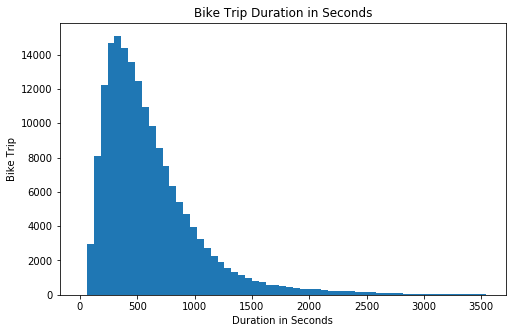

In [72]:
# plot duration in seconds on a standard scale
bin_edges = np.arange(0, 3600, 60)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bin_edges)
plt.title('Bike Trip Duration in Seconds')
plt.xlabel('Duration in Seconds')
plt.ylabel('Bike Trip')
plt.show()

In [73]:
# there is a long tail in the distribution, so let's put it on a log scale instead 
# transform the describe() to a scale of log10
np.log10(bike['duration_sec'].describe())

count    5.243519
mean     2.847696
std      3.215214
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

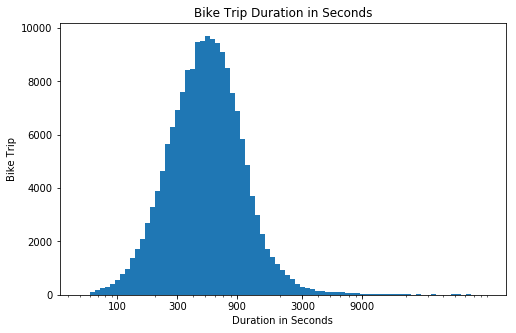

In [74]:
# univariate plot of bike trip duration in second
log_binsize = 0.04
bins = 10 ** np.arange(1.7, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 300, 900, 3000, 9000], ['100', '300', '900', '3000', '9000'])
plt.xlabel('Duration in Seconds')
plt.ylabel('Bike Trip')
plt.title ('Bike Trip Duration in Seconds')
plt.show()

Duration in seconds has a long-tailed distribution, with a lot of bike trips on the low duration end, and a few on the high duration end. When plotted on a log-scale, the duaration distribution looks unimodal and has a peak between 300 and 900. It is obvious that bike trips are usually within an hour mark (3600 seconds). This will help to further investigate user's behavior that determine demand of bike share.

Let's see disturibution for duration in minutes 

In [75]:
bike.duration_min.describe(percentiles = [.99])

count    175194.000000
mean         11.244786
std          27.357850
min           1.000000
50%           8.000000
99%          52.000000
max        1409.000000
Name: duration_min, dtype: float64

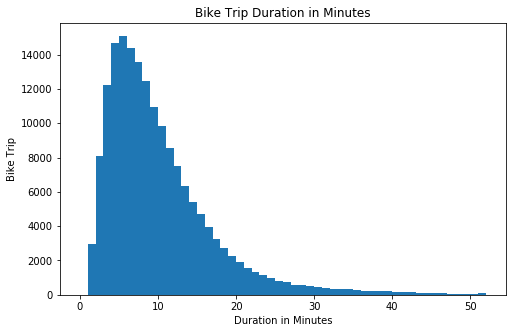

In [76]:
# plotting duration in minutes on a standard scale
bin_edges = np.arange(0, 53, 1)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_min', bins = bin_edges)
plt.title('Bike Trip Duration in Minutes')
plt.xlabel('Duration in Minutes')
plt.ylabel('Bike Trip')
plt.show()

Duration in minutes has a long-tailed distribution, with a lot of bike trips on the low duration end, and a few on the high duration end. There is a peak between 5 and 7 minutes and the duration distribution has ramp down towards high duration end

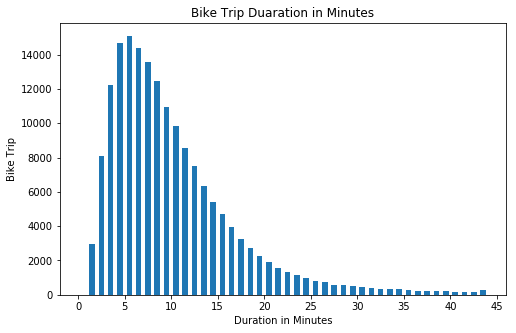

In [77]:
# plotting with a different bin size and tick labels
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_min', bins = bin_edges, rwidth = 0.6);

plt.title("Bike Trip Duaration in Minutes")
plt.xlabel('Duration in Minutes')
plt.ylabel('Bike Trip')
plt.xticks(ticks, labels)
plt.show()

Looking at the distribution, bike trip on average is between 4 and 10 minute range, with 75% of trips being under 14 minutes. This suggests that users are taking the bikes on short distances.

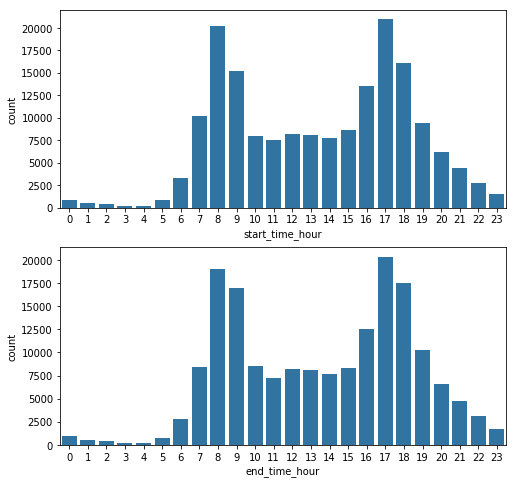

In [78]:
# plotting bike trip start hour of the day
# bike trip end hour
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'start_time_hour', color = default_color, ax=ax[0])
sb.countplot(data = bike, x = 'end_time_hour', color = default_color, ax=ax[1])

plt.show()

Interstingly, The distributions look similar and are both bimodal, with a peak in 8 (8am) and another in 17 (5pm). This reveals that users are more of working class that leave for work in the morning and come back home in the evening. Another interesting fact is that users in this category ride less than an hour and that is why both start time and end time peak at the same hour mark

In [79]:
# convert start time weekday into ordered categorical type
ordinal_var_dict = {'start_time_weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                    'age_group': ['Gen Z', 'Millennials', 'Gen X', 'Boomers II', 'Boomers I', 'Post War']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

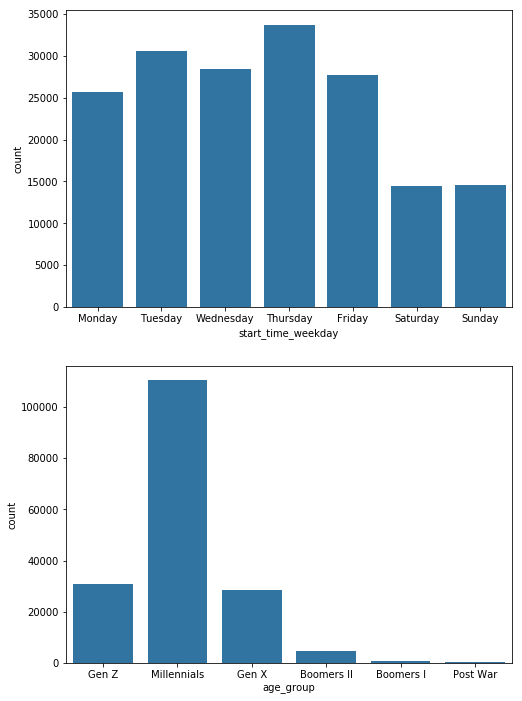

In [80]:
# plotting the weekday and age group which are ordered categorical variables

fig, ax = plt.subplots(nrows=2, figsize = [8, 12])
default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'start_time_weekday', color = default_color, ax = ax[0])
sb.countplot(data = bike, x = 'age_group', color = default_color, ax = ax[1])

plt.show()

Monday to Friday have high number of users which are generally working days, while bike trips are very low on both Saturday and Sunday (weekends) - period where people mostly stay and relax at home. And we have another visual that shows Millennials, ages (25-40) as the age group with the most bike trips

In [81]:
# trip distance summary
bike.distance_miles.describe()

count    175194.000000
mean          1.049088
std           0.681176
min           0.000000
25%           0.563668
50%           0.887658
75%           1.379962
max          43.139070
Name: distance_miles, dtype: float64

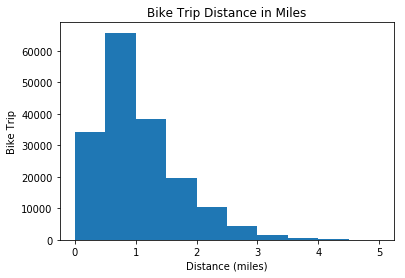

In [82]:
# now, let's look at the trip distance in miles
bins = np.arange(0, 5+0.5, 0.5)

plt.hist(data = bike, x = 'distance_miles', bins = bins);

plt.title('Bike Trip Distance in Miles')
plt.xlabel('Distance (miles)')
plt.ylabel('Bike Trip')
plt.show()

Trips are a mile on average, with users in the 3rd quartile ride about 1.38 miles. This reveals that on average, users go on a short trips, mostly under 2 miles.

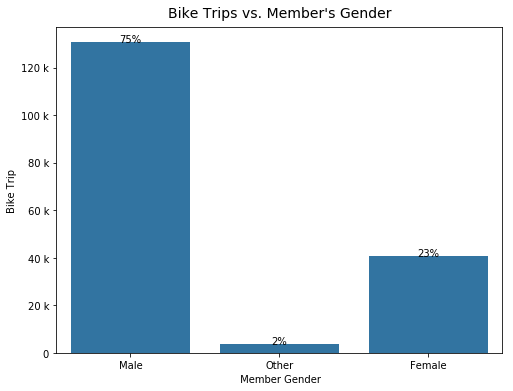

In [83]:
# import necessary library
from matplotlib.ticker import EngFormatter


plt.figure(figsize = [8,6])
# create the plot 
base_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'member_gender', color = base_color)
plt.title("Bike Trips vs. Member's Gender", fontsize=14, y=1.01)
plt.ylabel('Bike Trip')
plt.xlabel(" Member Gender")


# add annotations
n_points = bike.shape[0]
cat_counts = bike['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    ## get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    
        # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.gca().yaxis.set_major_formatter(EngFormatter())

75% of users are male, 23% are female and 2% are other gender.

In [84]:
# member age summary
bike.member_age.describe(percentiles = [.99])

count    175194.000000
mean         34.193637
std          10.113407
min          18.000000
50%          32.000000
99%          64.000000
max         119.000000
Name: member_age, dtype: float64

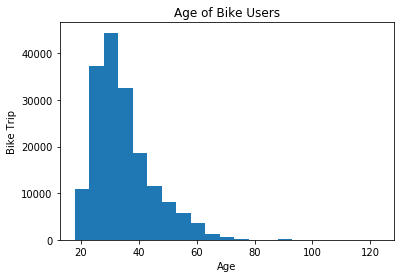

In [85]:
# plotting age distribution of users
bins = np.arange(18, 119+5, 5)

plt.hist(data = bike, x = 'member_age', bins = bins);

plt.title('Age of Bike Users')
plt.xlabel('Age')
plt.ylabel('Bike Trip')

plt.show()

The average age is 34. The distribution shows that users are between  the age of 25 and 40 which classifies them as young adults and working class.

In [86]:
# create top 5 start station count
start_station_count  = bike['start_station_name'].value_counts()
start_station_count = start_station_count[:5,]
start_station_count

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2954
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2621
Name: start_station_name, dtype: int64

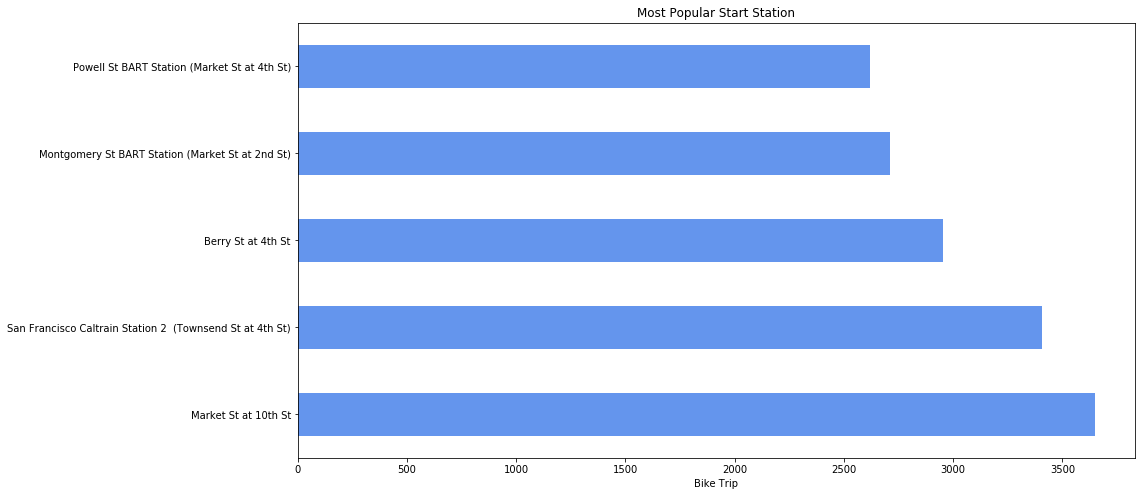

In [87]:
start_station_count.plot('barh', figsize=(15,8), color = 'cornflowerblue', title='Most Popular Start Station').set_xlabel("Bike Trip");

Market St is the most popular start station followed by San Francisco Caltrain Station 2.

In [88]:
# create top 5 end station
end_station_count  = bike['end_station_name'].value_counts()
end_station_count = end_station_count[:5,]
end_station_count

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3710
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3152
San Francisco Caltrain (Townsend St at 4th St)               2872
Name: end_station_name, dtype: int64

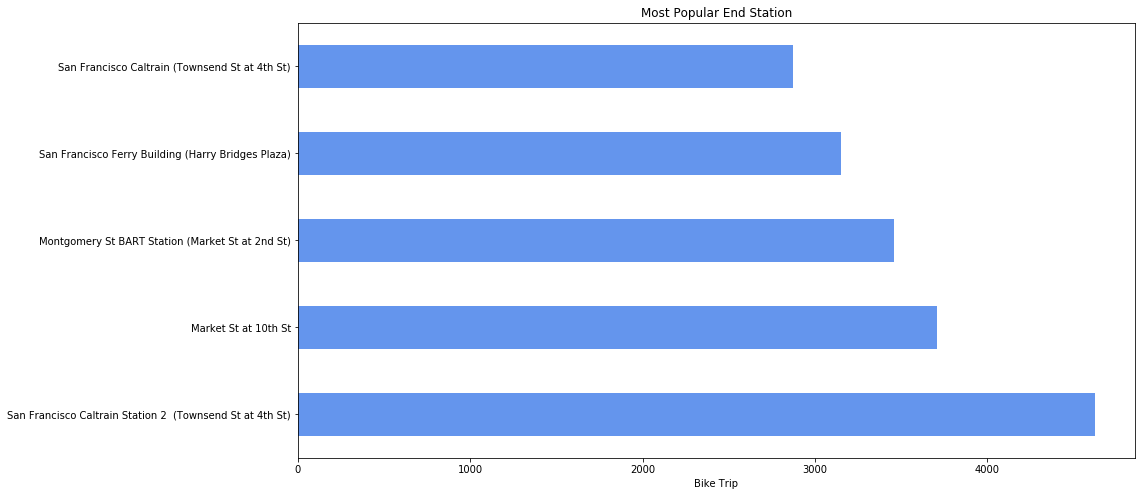

In [89]:
end_station_count.plot('barh', figsize=(15,8), color = 'cornflowerblue', title='Most Popular End Station').set_xlabel("Bike Trip");

San Francisco Caltrain Station 2 is observed to overtake Market St as the most popular end station.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


It is obvious that bike trips are usually within an hour mark (3600 seconds). This will help to further investigate user's behavior that determine demand of bikes. 

Bike trip on average is between 4 and 10 minute range, with 75% of trips being under 14 minutes. This suggests that users are taking the bikes on short distances.


Users most common start time hour is 8AM and most common end time hour is 5PM.  This reveals that users are more of working class that leave for work in the morning and come back home in the evening. Another interesting fact is that users in this category ride less than an hour and that is why both start time and end time peak at the same hour mark.


Monday to Friday have high number of users which are generally working days, while bike trips are very low on both Saturday and Sunday (weekends) - period where people mostly stay and relax at home. And we have another visual that shows Millennials, ages (25-40) as the age group with the most bike trips

75% of users are male, 23% are female and 2% are other gender.

The average age is 34. The distribution shows that users are between the age of 25 and 40 which classifies them as young adults and working class.


Market St is the most popular start station followed by San Francisco Caltrain Station 2. San Francisco Caltrain Station 2 is observed to overtake Market St as the most popular end station.


The following variables duration, distance and most especially, age have some outliers. In order to allow the plots to show the trends clearly, member year above 1900 were only selected from our dataset. The outliers could be caused by incorrect data entry.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The duration variable has a large range. Hence plot on a log scale helped to explore the data. Under the log transformation, the distribution is observed as unimodal.


## Bivariate Exploration

In this section, I investigate relationships between pairs of variables in the
data.

In [90]:
# create variable groups 
numeric_vars = ['duration_sec', 'duration_min', 'member_age', 'start_time_hour', 'end_time_hour', 'distance_miles']
categoric_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip', 'start_time_weekday', 'end_time_weekday']

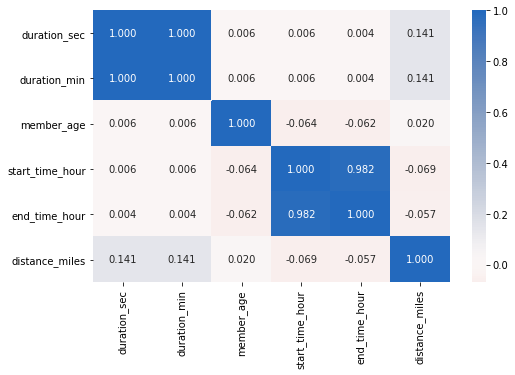

In [91]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

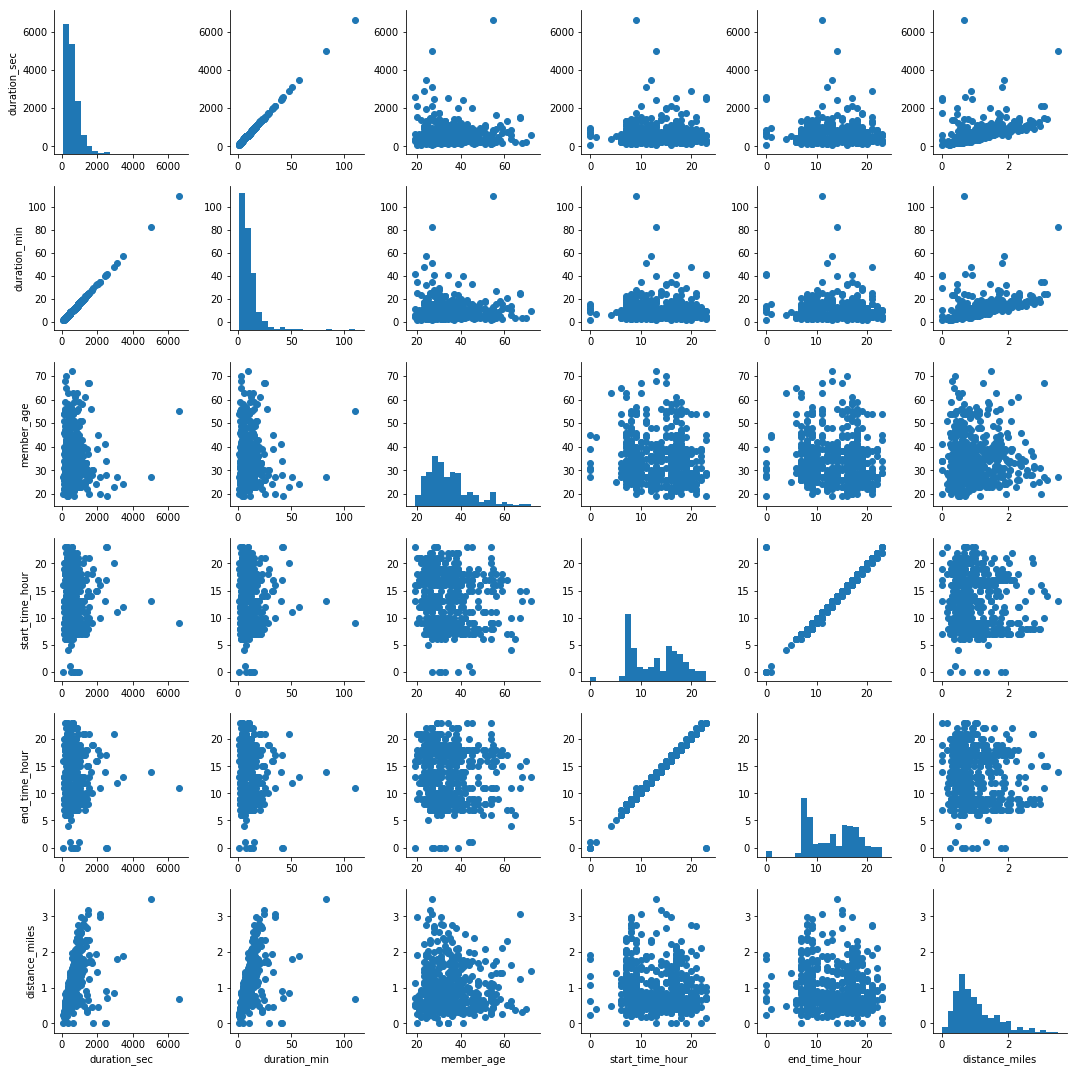

In [92]:
# plot matrix: sample 500 bike trips so that plots are clearer and
# they render faster
samples = np.random.choice(bike.shape[0], 500, replace = False)
trip_samp = bike.loc[samples,:]

g = sb.PairGrid(data = trip_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);



As expected, start time and end time are highly correlated with one another and duration in minutes with duration in seconds. Since time is the measure of bike trip duration. 

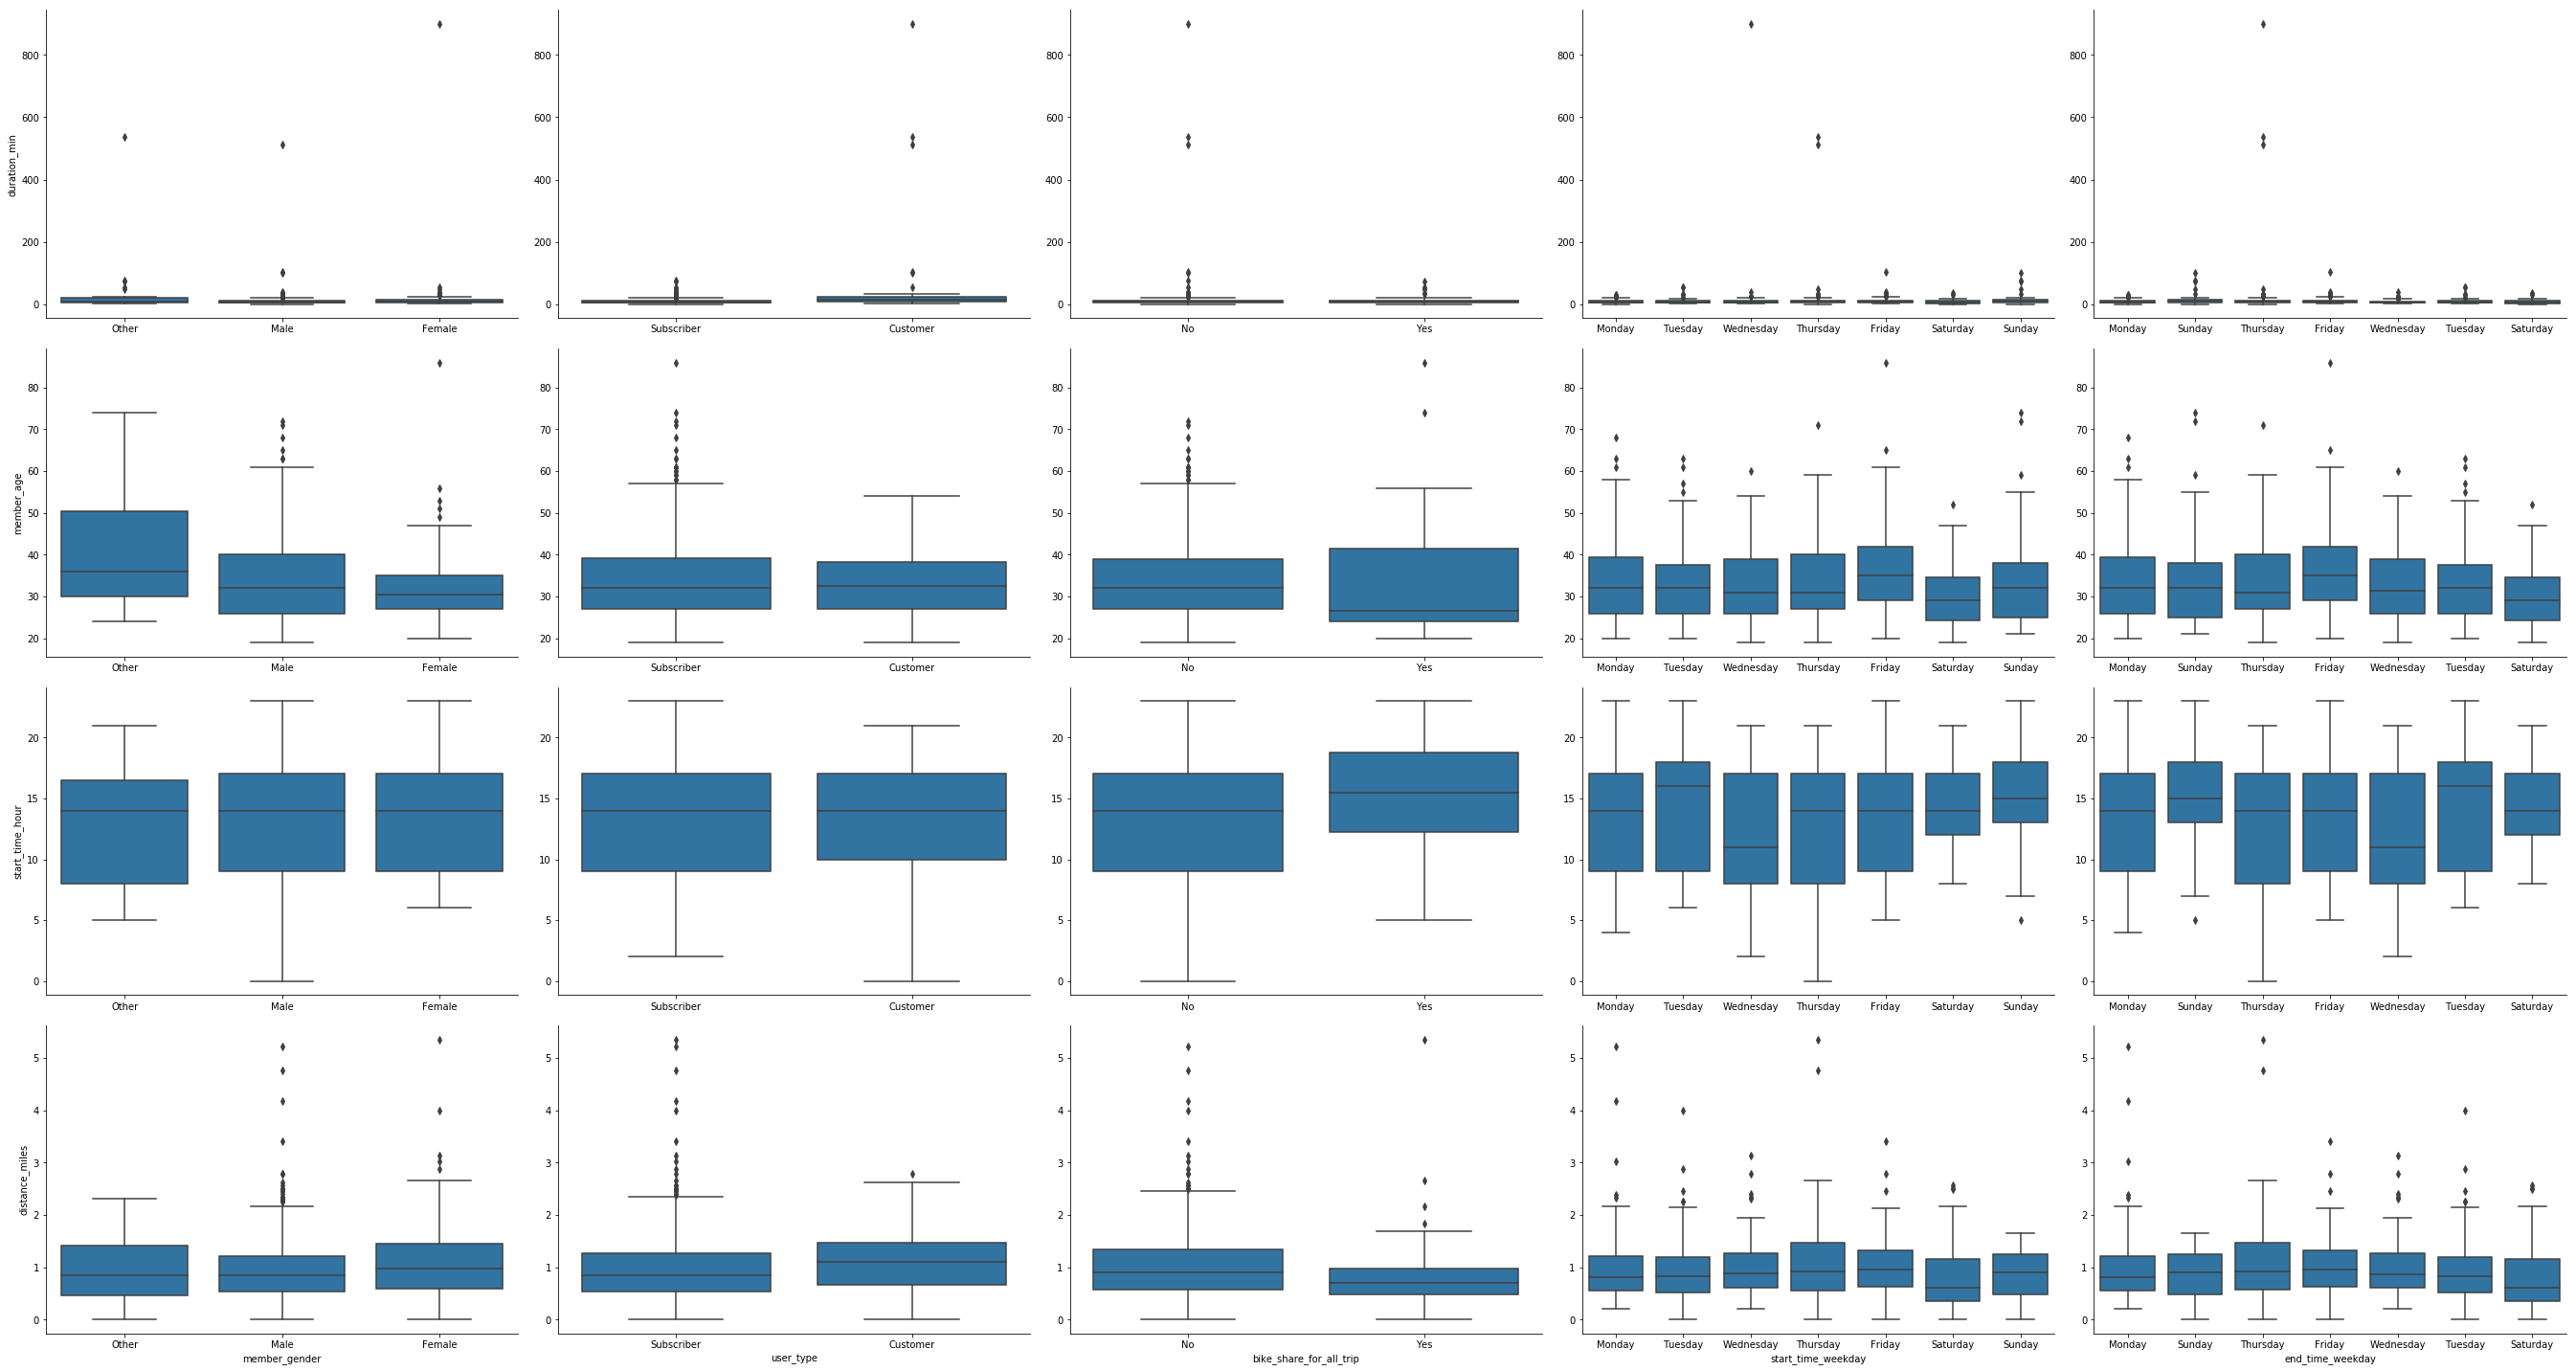

In [93]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(bike.shape[0], 500 , replace = False)
trip_samp = bike.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [8, 12])
g = sb.PairGrid(data = trip_samp, y_vars = ['duration_min', 'member_age', 'start_time_hour', 'distance_miles'], x_vars = categoric_vars, size = 5, aspect = 1.5)
g.map(boxgrid)

plt.show()

From the box plots, we can see the distributions of the trip distance, duration and member age, across different categorical variables. Averagely, the trip duration of subscribers are less than that of customers. As expected, subcribers will most likely use the bike share for their daily commute compared to customers who rent bikes for a single trip.


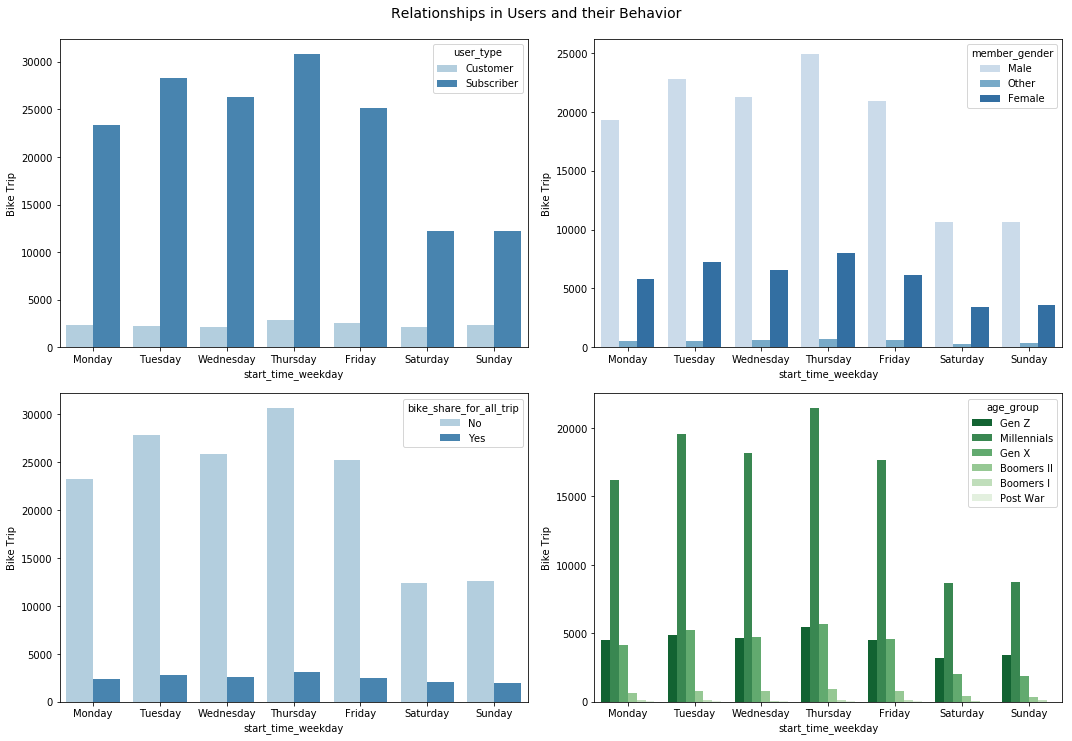

In [94]:
# plot the relationship between categorical variables
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = [15,10])
plt.suptitle('Relationships in Users and their Behavior', fontsize=14, y=1.025)

# subplot 1: weekday vs user type
plt.subplot(2, 2, 1)
sb.countplot(data = bike, x = 'start_time_weekday', hue = 'user_type', palette = 'Blues')
plt.ylabel('Bike Trip')

# subplot 2: weekday vs. member gender
plt.subplot(2, 2, 2)
sb.countplot(data = bike, x = 'start_time_weekday', hue = 'member_gender', palette = 'Blues')
plt.ylabel('Bike Trip')

# subplot 3: weekday vs. , bike share for all trip 
plt.subplot(2, 2, 3)
sb.countplot(data = bike, x = 'start_time_weekday', hue = 'bike_share_for_all_trip', palette = 'Blues')
plt.ylabel('Bike Trip')


# subplot 3: weekday vs. age group 
plt.subplot(2, 2, 4)
sb.countplot(data = bike, x = 'start_time_weekday', hue = 'age_group', palette = 'Greens_r') 
plt.ylabel('Bike Trip')

plt.tight_layout()

The trip number of subscribers is much higher than customers.

Male complete 2 times or more trips as female.

Bike share for all trip by users are very low compare to users that do not use bike share for all trip

Users between the ages (25-40) called Millennials use bike share the most in all weekdays

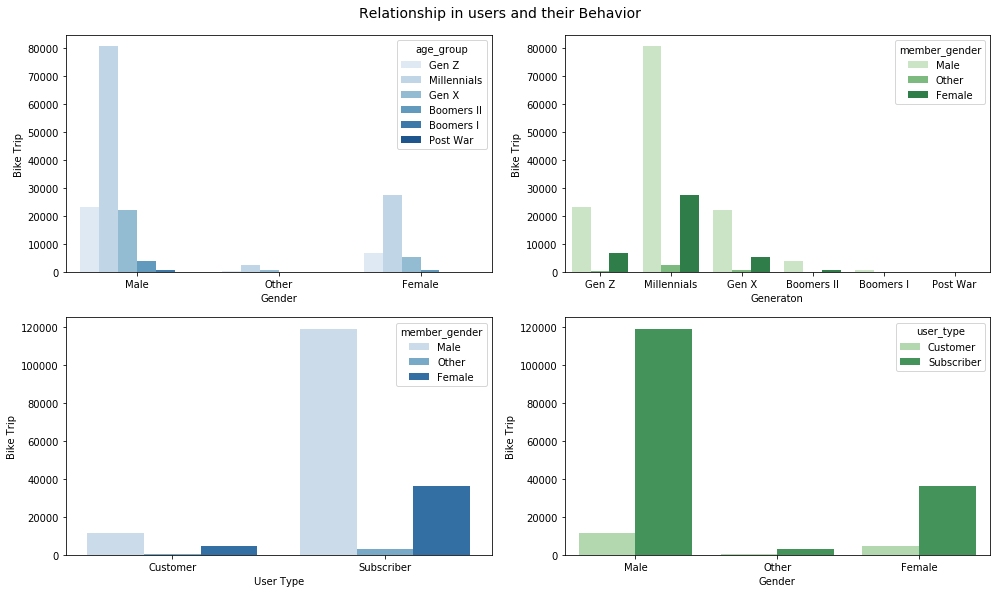

In [95]:
# plot the relationship between categorical variables
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize = [14,8])
base_color = sb.color_palette()[0]
plt.suptitle('Relationship in users and their Behavior', fontsize=14, y=1.025)

# member gender vs. age group
ax1 = plt.subplot(2,2,1)
ax1=sb.countplot(data = bike, x = 'member_gender', hue = 'age_group', palette = 'Blues') 
ax1= plt.xlabel("Gender")
ax1= plt.ylabel('Bike Trip')

# age group vs. member gender
ax2 = plt.subplot(2,2,2)
ax2=sb.countplot(data = bike, x = 'age_group', hue = 'member_gender', palette = 'Greens')
ax2= plt.xlabel("Generaton")
ax2= plt.ylabel('Bike Trip')

# user type vs. member gender
ax3 = plt.subplot(2,2,3)
ax3=sb.countplot(data = bike, x = 'user_type', hue = 'member_gender', palette = 'Blues') 
ax3= plt.xlabel('User Type')
ax3= plt.ylabel('Bike Trip')

# member gender vs. user type
ax4 = plt.subplot(2,2,4)
ax4=sb.countplot(data = bike, x = 'member_gender' , hue = 'user_type', palette = 'Greens')
ax4= plt.xlabel("Gender")
ax4= plt.ylabel('Bike Trip')

plt.tight_layout()

There are more males than females and other genders. Both male and female gender have more users in the age group called Millennials

Males dominate more in all the age groups

Males are the highest gender of users both as customers and as subscribers

Subcribers in male are more than in female, followed by other genders

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationships in user type with their gender and their behavior show that there are more subcribers who use bike share system for commute on all working days and interestingly there are more males than females as subcribers and also as customers. Another interesting fact is that users fall within the age group called MIllennials (25-40) which is also the age bracket for young adults and working class. Hence work days (Monday-Friday) have higher demand for bike trips, while the demand is significantly low on weekends (Saturday and Sunday) 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

## Multivariate Exploration


This section further analyzes the impact of user type and age group on the relationship between duration and distance.

I'll look specifically more into user type and age group. Since there's little effect of gender on both duration and distance, analysing member's gender in this analysis is not considered.

In [96]:
# define heatmap function 
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid."""
    palette = kwargs.pop('color')
    
    bin_size_x = 250 
    bin_size_y = 0.4
    bins_x = np.arange(0, 5000+bin_size_x, bin_size_x)
    bins_y = np.arange(0, 7+bin_size_y, bin_size_y)
    
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

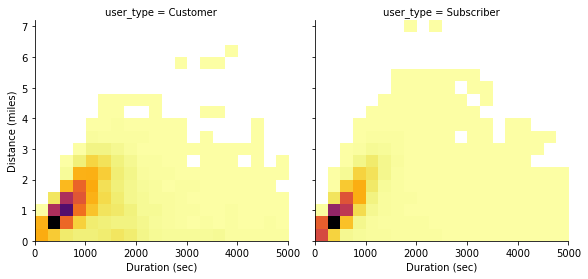

In [97]:
# create faceted heat maps on user_type
g = sb.FacetGrid(data = bike, col = 'user_type', col_wrap = 3, size = 4)

g.map(hist2dgrid, 'duration_sec', 'distance_miles', color = 'inferno_r')
g.set_xlabels('Duration (sec)')
g.set_ylabels('Distance (miles)')

plt.show()

From the faceted heat maps above, It is observed that there is an effect of user type on the relationship between usage duration in seconds and distance in miles.

For user type, customers tend to go on a long trip, that is, they use bike share for long durations and distances as compared to subscribers, whose trips are in short duration and distance. The more focused aspect in subscribers also revealed that subscribers are looking for a consistent experience, which is daily commute as compared to customers which use bike share for different purposes.

Now, let's look at the categorical variable, age group to the effect it has on both duration and distance.

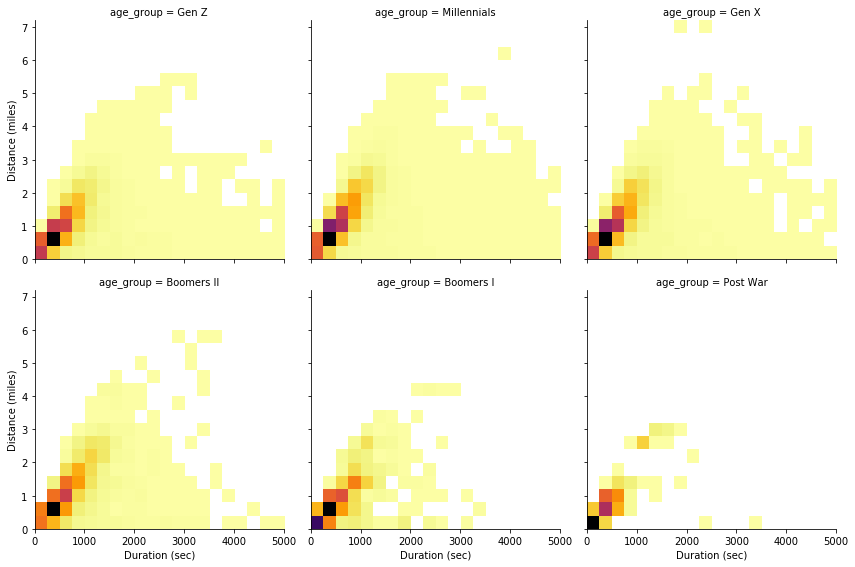

In [98]:
# create faceted heat maps on age_group
g = sb.FacetGrid(data = bike, col = 'age_group', col_wrap = 3, size = 4)

g.map(hist2dgrid, 'duration_sec', 'distance_miles', color = 'inferno_r')
g.set_xlabels('Duration (sec)')
g.set_ylabels('Distance (miles)')

plt.show()

In the faceted heat maps, there is little effectiveness on the relationship of age group against duration and distance of bike trips. As the age group increases, the 'cloud' of points spreads across the plot. 

Perhaps, focussing on the popular age group, which is Millennials in this case, to see the differences might provide a better summary.

In [99]:
# select dataset for member aged between 25 to 40
df_flag = ((bike['member_age'] >= 25) & (bike['member_age'] <= 40))
df_plot = bike.loc[df_flag,:]

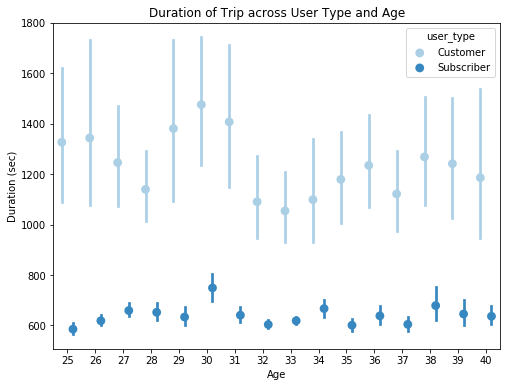

In [100]:
# setting the figure size
fig = plt.figure(figsize = [8,6])
# point plot of age against duration with user_type
ax = sb.pointplot(data = df_plot, x = 'member_age', y = 'duration_sec', hue = 'user_type',
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration of Trip across User Type and Age')
plt.ylabel('Duration (sec)')
plt.xlabel('Age')
ax.set_yticklabels([],minor = True)
plt.show();

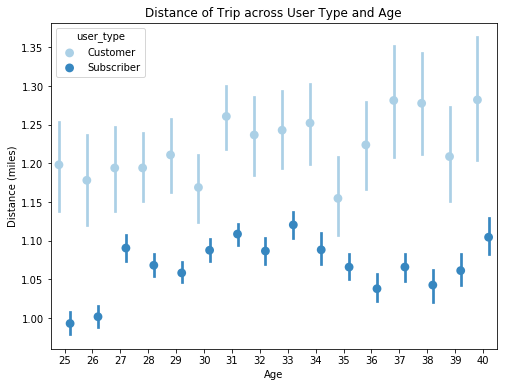

In [101]:
# set the figure size
fig = plt.figure(figsize = [8,6])
# point plot of age against duration with user_type
ax = sb.pointplot(data = df_plot, x = 'member_age', y = 'distance_miles', hue = 'user_type',
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Distance of Trip across User Type and Age')
plt.ylabel('Distance (miles)')
plt.xlabel('Age')
ax.set_yticklabels([],minor = True)
plt.show();

Here, age does not have any effect in predicting demand using bike duration of trip. Instead, there is a significant difference in duration of trip between subscriber and customer. Subscriber generally uses bike share for short distance trip and short duration trip unlike Customer that uses bike share for long distance trip and duration trip.

Comparing user type across weekdays and duration of trips.

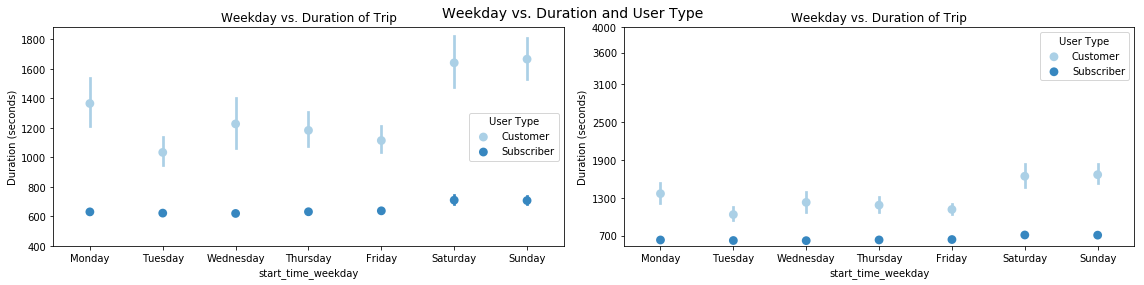

In [102]:
# plot the interactions between categorical variables and numeric variable
plt.figure(figsize = [16, 4])
plt.suptitle("Weekday vs. Duration and User Type", fontsize = 14)

ax1=plt.subplot(1,2, 1)
ax1=sb.pointplot(data = bike, x= 'start_time_weekday', y = 'duration_sec', 
                 hue = 'user_type', palette = 'Blues', linestyles = '')
ax1=plt.ylabel('Duration (seconds)')
ax1=plt.title('Weekday vs. Duration of Trip')
ax1=plt.yticks([400, 600, 800, 1000, 1200, 1400, 1600, 1800]) # 30 minutes
ax1=plt.legend(title='User Type')

ax2=plt.subplot(1, 2, 2)
ax2=sb.pointplot(data = bike, x= 'start_time_weekday', y = 'duration_sec', 
                 hue = 'user_type', palette = 'Blues', linestyles = '')
ax2=plt.ylabel('Duration (seconds)')
ax2=plt.title('Weekday vs. Duration of Trip')
ax2=plt.yticks([700,1.3e3, 1.9e3, 2.5e3, 3.1e3, 3.6e3, 4e3])
ax2=plt.legend(title='User Type')

plt.tight_layout()

As observed in the previous section, Customers trip duration is relatively high compare to subcribers trip duration. But more interestingly, there is a steep jump or increase in both customers duration and subcribers duration on weekends (Saturday and Sunday). 

Next, comparing age group of users across weekdays and duration of trips.

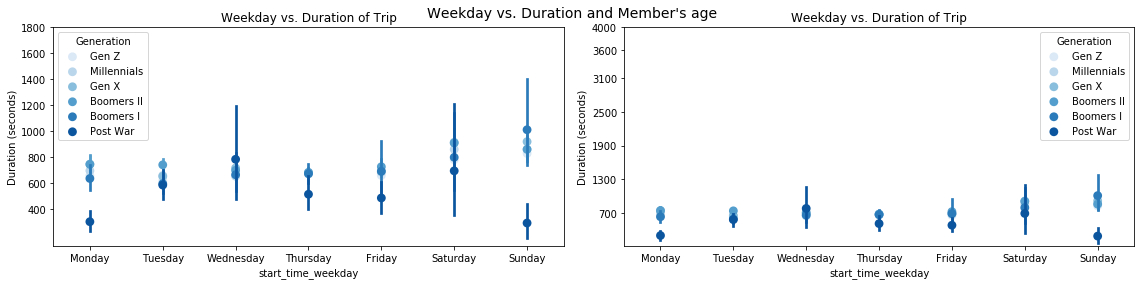

In [103]:
# plot the interactions between categorical variables and numeric variable
plt.figure(figsize = [16, 4])
plt.suptitle("Weekday vs. Duration and Member's age", fontsize = 14)

ax1=plt.subplot(1,2, 1)
ax1=sb.pointplot(data = bike, x= 'start_time_weekday', y = 'duration_sec', 
                 hue = 'age_group', palette = 'Blues', linestyles = '')
ax1=plt.ylabel('Duration (seconds)')
ax1=plt.title('Weekday vs. Duration of Trip')
ax1=plt.yticks([400, 600, 800, 1000, 1200, 1400, 1600, 1800]) # 30 minutes
ax1=plt.legend(title='Generation')

ax2=plt.subplot(1, 2, 2)
ax2=sb.pointplot(data = bike, x= 'start_time_weekday', y = 'duration_sec', 
                 hue = 'age_group', palette = 'Blues', linestyles = '')
ax2=plt.ylabel('Duration (seconds)')
ax2=plt.title('Weekday vs. Duration of Trip')
ax2=plt.yticks([700,1.3e3, 1.9e3, 2.5e3, 3.1e3, 3.6e3, 4e3])
ax2=plt.legend(title='Generation')

plt.tight_layout()

There are more short time trips on working days (Mon-Fri). The duration of trip of age range Gen Z, Millennials and Gen X is more stable than the older range. These have higher variation. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customers tend to go on a long distance and long duration trip while Subcribers use bike for both short distance and short duration trip. This reveals that Subcribers are looking for a consistent experience as they use bike for their daily commute.

Interestingly, there is a steep jump or increase in both customers duration and subcribers duration on weekends (Saturday and Sunday).

There are more short time trips on working days (Mon-Fri). The duration of trip of age range Gen Z, Millennials and Gen X is more stable than the older range.


### Were there any interesting or surprising interactions between features?

There were interesting and surprising interactions between features. For example, despite having low demand of bikes during weekends, users averagely go on a long trip for a long period of time which makes sense because biking is one of the great way of doing workout to keep the body healthy.


### References
Create a boolean series https://knowledge.udacity.com/questions/525039

Converting to numeric https://stackoverflow.com/questions/56391169/pandas-astypeint-applied-to-float-column-returns-negative-numbers

Extracting month as month name https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name

Extracting weekday as day name https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python

Calculating distance with Haversine formular https://knowledge.udacity.com/questions/282090

Knowing the right plot https://www.datapine.com/blog/how-to-choose-the-right-data-visualization-types/